In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data from the uploaded CSV file
file_path = 'NYPD_Complaint_Data_Current_YTD.csv'
data = pd.read_csv(file_path)

In [3]:
print(data.describe)

<bound method NDFrame.describe of         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0        736216184   09/30/2016     23:25:00   09/30/2016     23:25:00   
1        294332956   09/30/2016     23:16:00   09/30/2016     23:21:00   
2        852981427   09/30/2016     23:00:00   09/30/2016     23:05:00   
3        369976063   09/30/2016     23:00:00          NaN          NaN   
4        117213771   09/30/2016     23:00:00   09/30/2016     23:10:00   
...            ...          ...          ...          ...          ...   
361735   582350583   01/01/2015     03:50:00   01/01/2016     04:00:00   
361736   258046495   01/01/2015     01:25:00   01/01/2016     01:30:00   
361737   640212578   01/01/2015     00:30:00   01/01/2016     00:40:00   
361738   496500431   06/30/2014     12:00:00   12/29/2015     12:00:00   
361739   256379572   12/31/2001     16:00:00   01/01/2016     10:50:00   

            RPT_DT  KY_CD                      OFNS_DESC  PD_CD  \
0       09

In [4]:
data.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,3.617400e+05,361740.000000,361477.000000,361739.000000,3.558860e+05,355886.000000,355886.000000,355886.000000
mean,5.499403e+08,299.634970,411.857283,63.028830,1.005074e+06,207403.627327,40.735909,-73.924830
std,2.600874e+08,152.791634,221.006223,34.408404,2.152718e+04,30532.453319,0.083808,0.077635
min,1.000097e+08,101.000000,101.000000,1.000000,9.133570e+05,121250.000000,40.499229,-74.254939
25%,3.241697e+08,118.000000,254.000000,40.000000,9.919450e+05,184359.000000,40.672666,-73.972249
50%,5.502997e+08,341.000000,357.000000,63.000000,1.004550e+06,206483.000000,40.733400,-73.926716
75%,7.757034e+08,351.000000,638.000000,94.000000,1.016781e+06,235493.000000,40.813045,-73.882470
max,9.999994e+08,685.000000,922.000000,123.000000,1.067226e+06,271820.000000,40.912723,-73.700577


In [5]:
# Calculate the percentage of missing values in each column
missing_data = data.isnull().sum().sort_values(ascending=False)
percent_missing = (missing_data / len(data)) * 100

# Create a DataFrame to view the columns with missing values and their percentage
missing_values_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': percent_missing})
missing_values_df[missing_values_df['Missing Values'] > 0]

,Missing Values,Percentage
PARKS_NM,357819,98.916072
HADEVELOPT,343044,94.831647
LOC_OF_OCCUR_DESC,73339,20.273954
CMPLNT_TO_DT,62298,17.221761
CMPLNT_TO_TM,62150,17.180848
Lat_Lon,5854,1.618289
Longitude,5854,1.618289
Latitude,5854,1.618289
Y_COORD_CD,5854,1.618289
X_COORD_CD,5854,1.618289


In [6]:
# Attempting to remove columns again with direct reference to ensure correct execution
data.drop(['PARKS_NM', 'HADEVELOPT','X_COORD_CD','Y_COORD_CD','Lat_Lon'], axis=1, inplace=True)

# Display the current columns to verify the removal
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
# Remove duplicate rows from the dataset
data_cleaned = data.drop_duplicates()

# Remove rows with any missing values
data_cleaned = data_cleaned.dropna()

# Display the shape of the dataset before and after these operations to show how many rows were removed
original_shape = data.shape
cleaned_shape = data_cleaned.shape
print(original_shape)
print(cleaned_shape)

(361740, 19)
(235048, 19)


In [8]:
data_cleaned.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Latitude,Longitude
1,294332956,09/30/2016,23:16:00,09/30/2016,23:21:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,71.0,OPPOSITE OF,STREET,40.661205,-73.950687
2,852981427,09/30/2016,23:00:00,09/30/2016,23:05:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",COMPLETED,MISDEMEANOR,N.Y. HOUSING POLICE,BRONX,43.0,INSIDE,RESIDENCE - PUBLIC HOUSING,40.816872,-73.850685
4,117213771,09/30/2016,23:00:00,09/30/2016,23:10:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,N.Y. POLICE DEPT,QUEENS,110.0,FRONT OF,STREET,40.741458,-73.884339
9,589253624,09/30/2016,22:45:00,09/30/2016,22:50:00,09/30/2016,117,DANGEROUS DRUGS,501.0,"CONTROLLED SUBSTANCE,POSSESS.",COMPLETED,FELONY,N.Y. HOUSING POLICE,BRONX,43.0,FRONT OF,RESIDENCE - PUBLIC HOUSING,40.826549,-73.865131
10,585217984,09/30/2016,22:45:00,09/30/2016,23:05:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,68.0,INSIDE,RESIDENCE-HOUSE,40.624724,-74.001050


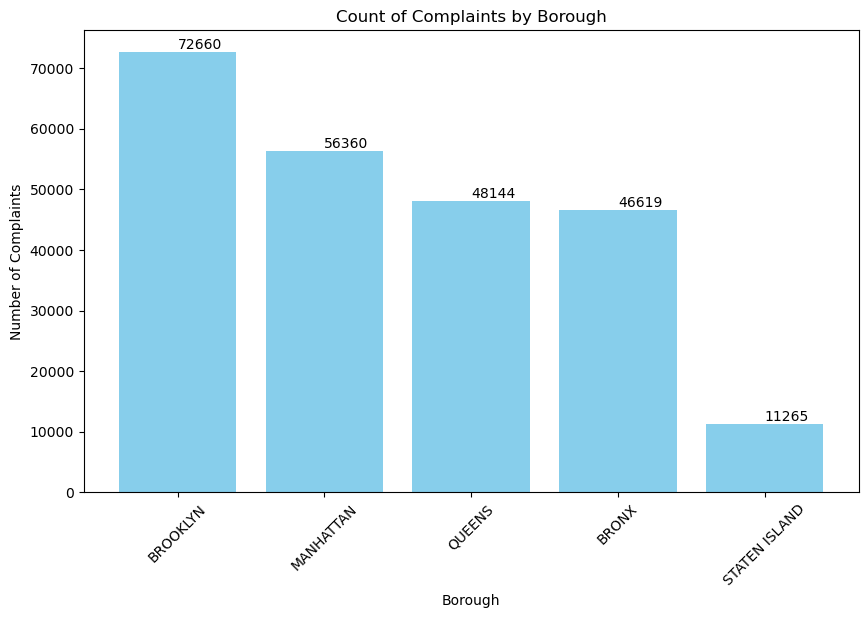

In [9]:
#Count of Complaints by Borough (established town or City )

borough_counts = data_cleaned['BORO_NM'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(borough_counts.index, borough_counts.values, color='skyblue')
plt.title('Count of Complaints by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # Center the text
plt.show()

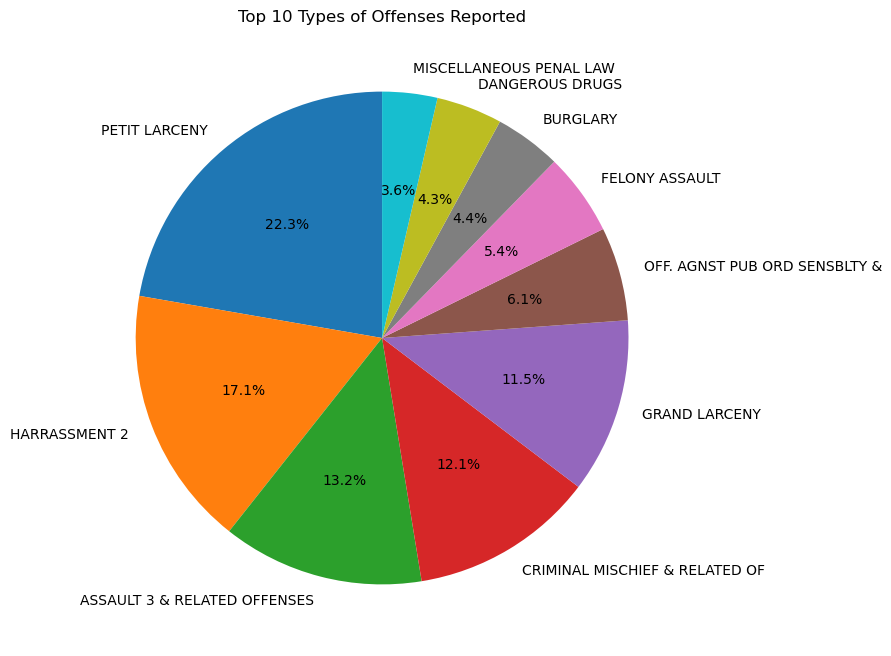

In [10]:
#Types of Offenses
offense_counts = data_cleaned['OFNS_DESC'].value_counts().head(10)  # Top 10 offenses
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(offense_counts, labels=offense_counts.index, autopct='%1.1f%%', startangle=90)
for text in autotexts:
    text.set_color('black')
plt.title('Top 10 Types of Offenses Reported')
plt.show()


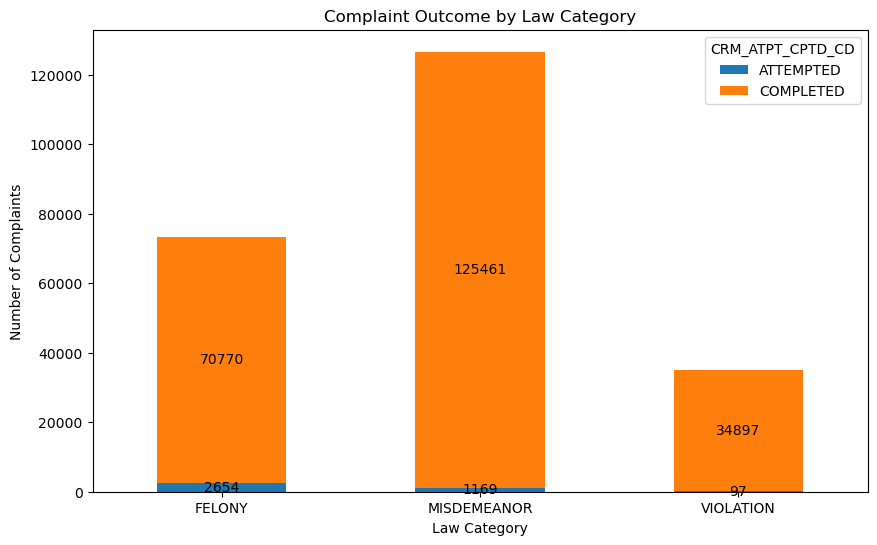

In [11]:
#Complaint Outcome by Law Category
outcome_by_category = data_cleaned.groupby(['LAW_CAT_CD', 'CRM_ATPT_CPTD_CD']).size().unstack()
bars = outcome_by_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Complaint Outcome by Law Category')
plt.xlabel('Law Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
for bar in bars.containers:
    plt.bar_label(bar, label_type='center')
plt.show()


In [12]:
# Drop non-numeric and redundant datetime columns
data_cleaned.drop(['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 
                   'RPT_DT'], axis=1, inplace=True)

# Label Encoding for categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['OFNS_DESC', 'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 
                       'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC']
encoding_mappings = {}
for column in categorical_columns:
    # If the column exists in the dataframe and is of type object (categorical)
    if column in data_cleaned.columns and data_cleaned[column].dtype == 'object':
        data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column].astype(str))
        encoding_mappings[column] = {index: label for index, label in enumerate(label_encoder.classes_)}
for column, mapping in encoding_mappings.items():
    print(f"Encoding for {column}: {mapping}")
# Check the datatypes again to confirm all are numeric
print(data_cleaned.dtypes)

# Select features and drop the target variable column for model input
X = data_cleaned.drop(['OFNS_DESC', 'CMPLNT_NUM', 'PD_DESC', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',], axis=1)
y = data_cleaned['OFNS_DESC'] 

# Display the first few rows of the prepared data to verify changes
print(data_cleaned.head())

Encoding for OFNS_DESC: {0: 'ADMINISTRATIVE CODE', 1: 'ADMINISTRATIVE CODES', 2: 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 3: 'ALCOHOLIC BEVERAGE CONTROL LAW', 4: 'ANTICIPATORY OFFENSES', 5: 'ARSON', 6: 'ASSAULT 3 & RELATED OFFENSES', 7: "BURGLAR'S TOOLS", 8: 'BURGLARY', 9: 'CHILD ABANDONMENT/NON SUPPORT', 10: 'CRIMINAL MISCHIEF & RELATED OF', 11: 'CRIMINAL TRESPASS', 12: 'DANGEROUS DRUGS', 13: 'DANGEROUS WEAPONS', 14: 'DISORDERLY CONDUCT', 15: 'DISRUPTION OF A RELIGIOUS SERV', 16: 'ENDAN WELFARE INCOMP', 17: 'ESCAPE 3', 18: 'FELONY ASSAULT', 19: 'FORGERY', 20: 'FRAUDS', 21: 'FRAUDULENT ACCOSTING', 22: 'GAMBLING', 23: 'GRAND LARCENY', 24: 'GRAND LARCENY OF MOTOR VEHICLE', 25: 'HARRASSMENT 2', 26: 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 27: 'INTOXICATED & IMPAIRED DRIVING', 28: 'JOSTLING', 29: 'KIDNAPPING', 30: 'KIDNAPPING & RELATED OFFENSES', 31: 'LOITERING/GAMBLING (CARDS, DIC', 32: 'MISCELLANEOUS PENAL LAW', 33: 'NYS LAWS-UNCLASSIFIED FELONY', 34: 'NYS LAWS-UNCLASSIFIED VIOLATION', 35: 'OFF.

In [13]:
def get_score_DTC(X_train, X_test, y_train, y_test):
    regressor = DecisionTreeClassifier(max_depth=4)
    regressor.fit(X_train, y_train)
    return regressor.score(X_train, y_train)

def get_score_RFC(X_train, X_test, y_train, y_test):
    regressor = RandomForestClassifier(max_depth=4)
    regressor.fit(X_train, y_train)
    return regressor.score(X_train, y_train)
acc_dtc=[]
acc_rfc=[]

dataset = data_cleaned
# print(dataset)
X = data_cleaned.drop(['OFNS_DESC', 'CMPLNT_NUM', 'PD_DESC', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',], axis=1)
y = data_cleaned['OFNS_DESC']

# Initialize KFold
kf = KFold(n_splits=15, shuffle=True, random_state=42)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# List to store scores
dt_scores = []
rf_scores = []

# Perform K-Fold CV
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit Decision Tree
    dt.fit(X_train, y_train)
    dt_scores.append(dt.score(X_test, y_test))
    
    # Fit Random Forest
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logestic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic regression: {accuracy:.3f}')
print("Average Decision Tree accuracy: ", sum(dt_scores) / len(dt_scores))
print("Average Random Forest accuracy: ", sum(rf_scores) / len(rf_scores))

Accuracy of Logistic regression: 0.836
Average Decision Tree accuracy:  0.9999149111778747
Average Random Forest accuracy:  0.9987917366622838


C:\Users\harin\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#using regressor model
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

#we'll look at MSE, RMSE and Accuracy
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

MSE: 0.02
RMSE: 0.13
